In [239]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [240]:
url = "https://raw.githubusercontent.com/Abhay1706/Data/refs/heads/main/delivery_time.csv"
data = pd.read_csv(url)
df = data.copy()   #Creating copy of actual data

# Basic Information Check

In [242]:
print("📋 DataFrame Info:")
print(df.info())
print("\n📊 Statistical Summary:")
print(df.describe())


📋 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes
None

📊 Statistical Summary:
       Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000


In [243]:
print("\n❓ Missing Values Count:")
print(df.isnull().sum())  ### To find how many null values we have in our data


❓ Missing Values Count:
Delivery Time    0
Sorting Time     0
dtype: int64


In [244]:
Shape = df.shape
print(f"\n🔢 Shape of the DataFrame: {Shape} (rows, columns)") ### to check how many rows and columns we have



🔢 Shape of the DataFrame: (21, 2) (rows, columns)


# Exploratory Data Analysis(EDA)

In [246]:
print("📈 Correlation between 'Delivery Time' and 'Sorting Time':")
print(df[['Delivery Time', 'Sorting Time']].corr())

📈 Correlation between 'Delivery Time' and 'Sorting Time':
               Delivery Time  Sorting Time
Delivery Time       1.000000      0.825997
Sorting Time        0.825997      1.000000


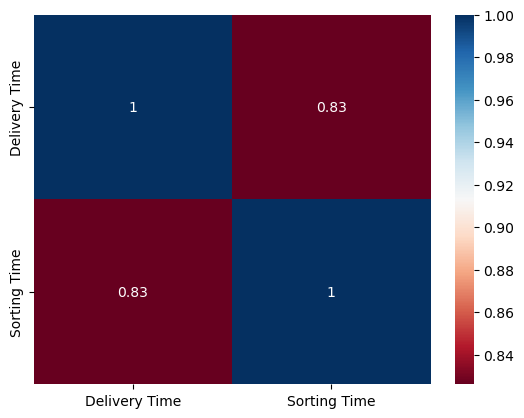

In [247]:
sns.heatmap(df[['Delivery Time','Sorting Time']].corr(),annot=True,cmap="RdBu",cbar=True)
plt.savefig("Delivery_corr.png",dpi=100)
plt.show()

In [248]:
# There is a strong positive correlation between 'Delivery Time' and 'Sorting Time', 
# indicating that as sorting time increases, delivery time tends to increase as well.

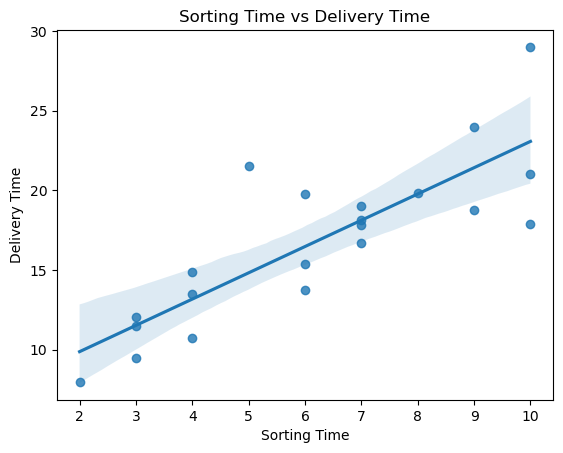

In [249]:
# Scatter plot to check correlation
sns.regplot(x='Sorting Time', y='Delivery Time', data=df)
plt.title('Sorting Time vs Delivery Time')
plt.savefig("Delivery_Regression.png")
plt.show()

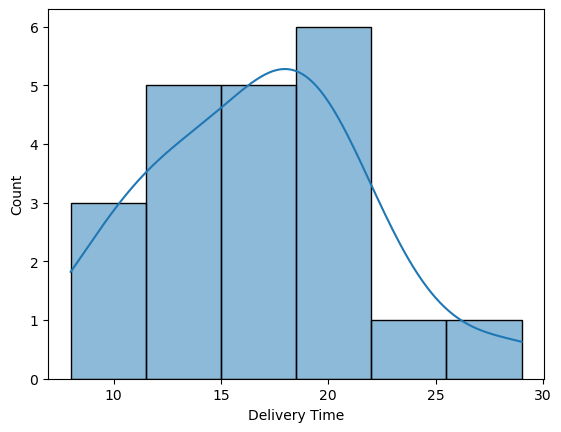

In [250]:
sns.histplot(x = 'Delivery Time', data = df, kde=True)
plt.show()

In [251]:
import scipy.stats as stats
skewness = stats.skew(df['Delivery Time'])
print(f'Skewness of Delivery Time data is {round(skewness,2)}')

Skewness of Delivery Time data is 0.33


In [252]:
#The graph shows it is right skewed

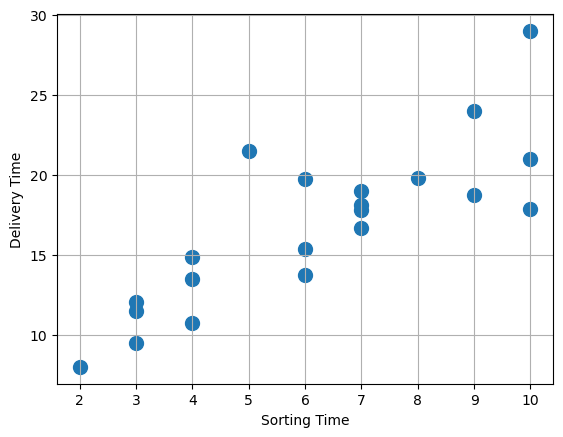

In [253]:
df.plot(x="Sorting Time",y="Delivery Time",kind="scatter",s=100,grid=True)
plt.savefig("Delivery_scatter.png",dpi=100)
plt.show()

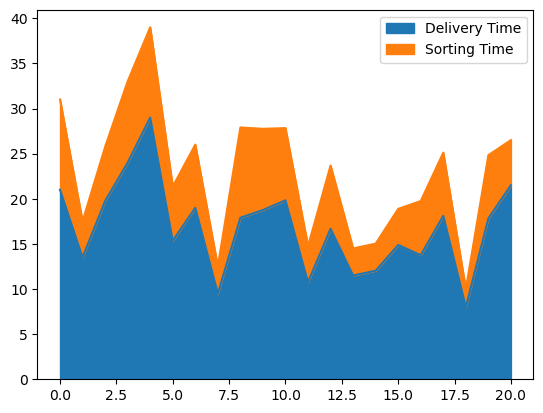

In [254]:
df[["Delivery Time","Sorting Time"]].plot(kind='area',legend=True)
plt.savefig("Delivery_area.png",dpi=100)
plt.show()

In [255]:
# This area graph shows that Sorting time is greater than Delivery time.
# The Delivery time pattern and the Sorting time pattern are almost the same.

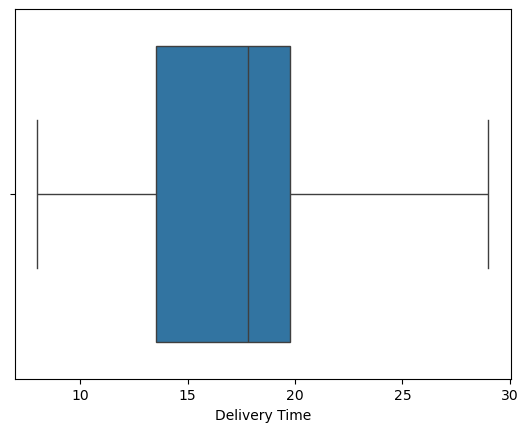

In [256]:
sns.boxplot(x = 'Delivery Time', data= df)
plt.show()

In [257]:
#There are no outliners in the data

# Simple Linear Regrression

## Objective - To predict Delivery Time using Sorting Time

In [260]:
# Here we have X as Sorting Time or Independent Variable
# and y as Delivery Time or Dependent Variable or Target Variable 

In [261]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from math import sqrt

## Splitting the train_test_split as 80:20

In [263]:
x = df[['Sorting Time']]
print("First 5 rows of 'Sorting Time' column:")
print(x.head())

First 5 rows of 'Sorting Time' column:
   Sorting Time
0            10
1             4
2             6
3             9
4            10


In [264]:
y = df[['Delivery Time']]
print("First 5 rows of 'Delivery Time' column:")
print(y.head())

First 5 rows of 'Delivery Time' column:
   Delivery Time
0          21.00
1          13.50
2          19.75
3          24.00
4          29.00


In [265]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y, test_size=0.2)
print("First 5 rows of x_train1:")
print(x_train1.head())

print("\nFirst 5 values of y_train1:")
print(y_train1.head())

First 5 rows of x_train1:
    Sorting Time
1              4
4             10
16             6
5              6
6              7

First 5 values of y_train1:
    Delivery Time
1           13.50
4           29.00
16          13.75
5           15.35
6           19.00


In [266]:
model1 = LinearRegression()

In [267]:
import time
model1_training  = model1.fit(x_train1,y_train1)
start_time = time.time()
print("✅ Initial model training completed.")
print(f"⏱️ Time taken: {time.time() - start_time:.4f} seconds")

✅ Initial model training completed.
⏱️ Time taken: 0.0000 seconds


In [351]:
#### Training Scores --- 
r2 = model1_training.score(x_train1, y_train1)   
print("📊 R-squared on Model1 Training:", round(r2,4))

📊 R-squared on Model1 Training: 0.5838


In [269]:
y_pred1 = model1_training.predict(x_test)
print("Predicted values (y_pred1):")
print(y_pred1)

Predicted values (y_pred1):
[[22.87961003]
 [18.30440111]
 [13.7291922 ]
 [13.7291922 ]
 [22.87961003]]


In [270]:
print("Actual values (y_test3):",y_test1)

Actual values (y_test3):     Delivery Time
7            9.50
15          14.88
10          19.83
18           8.00
12          16.68


In [271]:
model1_r2score = r2_score(y_test1, y_pred1)
print(f"R² Score for Model 1: {model1_r2score:.4f}")

R² Score for Model 1: -2.0548


In [272]:
intercept = model1_training.intercept_
slope = model1_training.coef_

print("📈 Slope (coefficients):", slope)
print("📉 Constant (intercept):", intercept)

📈 Slope (coefficients): [[1.52506964]]
📉 Constant (intercept): [7.62891365]


In [273]:
model1_rmse = sqrt(mean_absolute_error(y_pred1,y_test1))
print("📉 Root Mean Squared Error (RMSE):", round(rmse,4))

📉 Root Mean Squared Error (RMSE): 1.6135


## Splitting the train_test_model as 70:30

In [275]:
x = df[['Sorting Time']]
print("First 5 rows of 'Sorting Time' column:")
x.head()

First 5 rows of 'Sorting Time' column:


Sorting Time
0            10
1             4
2             6
3             9
4            10

In [276]:
y = df[['Delivery Time']]
print("First 5 rows of 'Delivery Time' column:")
y.head()

First 5 rows of 'Delivery Time' column:


Delivery Time
0          21.00
1          13.50
2          19.75
3          24.00
4          29.00

In [277]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x,y,test_size=0.3)
print("First 5 rows of x_train2:")
print(x_train2.head())

print("\nFirst 5 values of y_train2:")
print(y_train2.head())

First 5 rows of x_train2:
    Sorting Time
11             4
17             7
9              9
7              3
14             3

First 5 values of y_train2:
    Delivery Time
11          10.75
17          18.11
9           18.75
7            9.50
14          12.03


In [278]:
model2 = LinearRegression()

In [279]:
import time
model2_training = model2.fit(x_train2,y_train2)
start_time = time.time()
print("✅ Initial model training completed.")
print(f"⏱️ Time taken: {time.time() - start_time:.4f} seconds")

✅ Initial model training completed.
⏱️ Time taken: 0.0000 seconds


In [280]:
model2_score = model2_training.score(x_train2,y_train2)
print("📊 R-squared on Model2 Training:", round(model2_score,4))

📊 R-squared on Model2 Training: 0.7659


In [281]:
y_pred2 = model2_training.predict(x_test2)
print("Predicted values (y_pred2):")
print(y_pred2)

Predicted values (y_pred2):
[[15.76962069]
 [21.12493103]
 [15.76962069]
 [10.41431034]
 [14.4307931 ]
 [13.09196552]
 [19.78610345]]


In [282]:
print("Actual values (y_test2):",y_test2)

Actual values (y_test2):     Delivery Time
16          13.75
4           29.00
5           15.35
18           8.00
20          21.50
15          14.88
3           24.00


In [283]:
model2_r2score = r2_score(y_test2, y_pred2)
print(f"R² Score for Model 2: {model1_r2score:.4f}")

R² Score for Model 2: -2.0548


In [284]:
intercept = model2_training.intercept_
slope = model2_training.coef_

print("📈 Slope (coefficients):", slope)
print("📉 Constant (intercept):", intercept)

📈 Slope (coefficients): [[1.33882759]]
📉 Constant (intercept): [7.73665517]


In [285]:
rmse = sqrt(mean_absolute_error(y_pred2, y_test2))
print("📉 Root Mean Squared Error (RMSE):", round(rmse,4))

📉 Root Mean Squared Error (RMSE): 1.9198


## Splitting the train_test_model as 75:25

In [287]:
x = df[['Sorting Time']]
print("First 5 rows of 'Sorting Time' column:")
x.head()

First 5 rows of 'Sorting Time' column:


Sorting Time
0            10
1             4
2             6
3             9
4            10

In [288]:
y = df[['Delivery Time']]
print("First 5 rows of 'Delivery Time' column:")
y.head()

First 5 rows of 'Delivery Time' column:


Delivery Time
0          21.00
1          13.50
2          19.75
3          24.00
4          29.00

In [289]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x,y, test_size=0.25)
print("First 5 rows of x_train3:")
print(x_train3.head())

print("\nFirst 5 values of y_train3:")
print(y_train3.head())

First 5 rows of x_train3:
    Sorting Time
13             3
19             7
2              6
16             6
17             7

First 5 values of y_train3:
    Delivery Time
13          11.50
19          17.83
2           19.75
16          13.75
17          18.11


In [290]:
model3 = LinearRegression()

In [291]:
import time
model3_training = model3.fit(x_train3,y_train3)
start_time = time.time()
print("✅ Initial model training completed.")
print(f"⏱️ Time taken: {time.time() - start_time:.4f} seconds")

✅ Initial model training completed.
⏱️ Time taken: 0.0000 seconds


In [292]:
model3_r2score = model3_training.score(x_train3,y_train3)
("📊 R-squared on Model3 Training:", round(model3_r2score,4))

('📊 R-squared on Model3 Training:', 0.7271)

In [293]:
y_pred3 = model3_training.predict(x_test3)
print("Predicted values (y_pred3):")
print(y_pred3)

Predicted values (y_pred3):
[[17.99526642]
 [13.13560099]
 [19.61515489]
 [14.75548947]
 [17.99526642]
 [11.51571252]]


In [294]:
print("Actual values (y_test3):")
print(y_test3)

Actual values (y_test3):
    Delivery Time
6           19.00
11          10.75
10          19.83
20          21.50
12          16.68
7            9.50


In [295]:
r2score3 = r2_score(y_test3, y_pred3)
print(f"R² Score for Model 3: {r2score3:.4f}")

R² Score for Model 3: 0.5318


In [296]:
intercept = model3_training.intercept_
slope = model3_training.coef_

print("📈 Slope (coefficients):", slope)
print("📉 Constant (intercept):", intercept)

📈 Slope (coefficients): [[1.61988848]]
📉 Constant (intercept): [6.65604709]


In [353]:
rmse = sqrt(mean_absolute_error(y_pred3, y_test3))
print("📉 Root Mean Squared Error (RMSE):", round(rmse,4))

📉 Root Mean Squared Error (RMSE): 1.51


## Saving the model

In [356]:
import joblib

In [358]:
joblib.dump(model3_training, 'model3_delivery.pkl')  ### Saving only the best Model

['model3_delivery.pkl']